In [16]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
!pip install yfinance numpy pandas

In [18]:
import yfinance as yf, pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [19]:
filepath = "/content/drive/MyDrive/Dow_adjcloses.csv"
df = pd.read_csv(filepath)
df

,Date,MMM,AXP,AAPL,BA,CAT,CVX,CSCO,KO,DIS,...,NKE,PFE,PG,TRV,UTX,UNH,VZ,V,WMT,WBA
0,2000-01-03,29.847043,35.476634,3.530576,26.650218,14.560887,21.582046,43.003876,16.983583,23.522220,...,4.701180,16.746856,32.227726,20.158885,21.319030,5.841355,22.564221,NaN,47.337599,21.713237
1,2000-01-04,28.661131,34.134275,3.232839,26.610431,14.372251,21.582046,40.577200,17.040950,24.899860,...,4.445214,16.121738,31.596399,19.890099,20.445803,5.766368,21.833915,NaN,45.566248,20.907354
2,2000-01-05,30.122175,33.959430,3.280149,28.473758,14.914205,22.049145,40.895453,17.228147,25.781550,...,4.702157,16.415912,31.325831,20.085579,20.254784,5.753327,22.564221,NaN,44.503437,21.097421
3,2000-01-06,31.877325,33.959430,2.996290,28.553331,15.459153,22.903343,39.781569,17.210031,24.899860,...,4.677733,16.972739,32.438168,20.122232,20.998392,5.964159,22.449405,NaN,45.126952,20.527220
4,2000-01-07,32.509812,34.433913,3.138219,29.382213,15.962182,23.305926,42.128682,18.342270,24.506249,...,4.677733,18.123166,35.023602,20.922479,21.830687,6.662948,22.282692,NaN,48.535033,21.051805
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4799,2019-01-31,200.300000,102.700000,166.440000,385.620000,133.160000,114.650000,47.290000,48.130000,111.520000,...,81.880000,42.450000,96.470000,125.540000,118.070000,270.200000,55.060000,135.01,95.830000,72.260000
4800,2019-02-01,199.160000,103.060000,166.520000,387.430000,130.910000,118.370000,47.340000,48.700000,111.300000,...,81.510000,42.880000,97.470000,126.490000,118.980000,268.720000,54.550000,140.15,93.860000,71.880000
4801,2019-02-04,200.210000,103.420000,171.250000,397.000000,130.880000,119.740000,47.350000,49.250000,111.800000,...,81.990000,42.440000,98.030000,126.040000,119.140000,268.210000,54.040000,141.50,94.770000,71.460000
4802,2019-02-05,201.120000,103.900000,174.180000,410.180000,132.000000,119.480000,47.260000,49.260000,112.660000,...,82.860000,42.110000,97.440000,126.180000,120.770000,266.310000,54.140000,142.53,95.600000,71.310000


In [20]:
df.set_index(keys='Date',inplace=True)
df

,MMM,AXP,AAPL,BA,CAT,CVX,CSCO,KO,DIS,DWDP,...,NKE,PFE,PG,TRV,UTX,UNH,VZ,V,WMT,WBA
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,29.847043,35.476634,3.530576,26.650218,14.560887,21.582046,43.003876,16.983583,23.522220,NaN,...,4.701180,16.746856,32.227726,20.158885,21.319030,5.841355,22.564221,NaN,47.337599,21.713237
2000-01-04,28.661131,34.134275,3.232839,26.610431,14.372251,21.582046,40.577200,17.040950,24.899860,NaN,...,4.445214,16.121738,31.596399,19.890099,20.445803,5.766368,21.833915,NaN,45.566248,20.907354
2000-01-05,30.122175,33.959430,3.280149,28.473758,14.914205,22.049145,40.895453,17.228147,25.781550,NaN,...,4.702157,16.415912,31.325831,20.085579,20.254784,5.753327,22.564221,NaN,44.503437,21.097421
2000-01-06,31.877325,33.959430,2.996290,28.553331,15.459153,22.903343,39.781569,17.210031,24.899860,NaN,...,4.677733,16.972739,32.438168,20.122232,20.998392,5.964159,22.449405,NaN,45.126952,20.527220
2000-01-07,32.509812,34.433913,3.138219,29.382213,15.962182,23.305926,42.128682,18.342270,24.506249,NaN,...,4.677733,18.123166,35.023602,20.922479,21.830687,6.662948,22.282692,NaN,48.535033,21.051805
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-31,200.300000,102.700000,166.440000,385.620000,133.160000,114.650000,47.290000,48.130000,111.520000,53.81,...,81.880000,42.450000,96.470000,125.540000,118.070000,270.200000,55.060000,135.01,95.830000,72.260000
2019-02-01,199.160000,103.060000,166.520000,387.430000,130.910000,118.370000,47.340000,48.700000,111.300000,53.47,...,81.510000,42.880000,97.470000,126.490000,118.980000,268.720000,54.550000,140.15,93.860000,71.880000
2019-02-04,200.210000,103.420000,171.250000,397.000000,130.880000,119.740000,47.350000,49.250000,111.800000,53.13,...,81.990000,42.440000,98.030000,126.040000,119.140000,268.210000,54.040000,141.50,94.770000,71.460000


# Exploratory Data Analysis

In [21]:
df.dtypes

,0
MMM,float64
AXP,float64
AAPL,float64
BA,float64
CAT,float64
CVX,float64
CSCO,float64
KO,float64
DIS,float64
DWDP,float64


In [22]:
df.columns

Index(['MMM', 'AXP', 'AAPL', 'BA', 'CAT', 'CVX', 'CSCO', 'KO', 'DIS', 'DWDP',
       'XOM', 'GS', 'HD', 'IBM', 'INTC', 'JNJ', 'JPM', 'MCD', 'MRK', 'MSFT',
       'NKE', 'PFE', 'PG', 'TRV', 'UTX', 'UNH', 'VZ', 'V', 'WMT', 'WBA'],
      dtype='object')

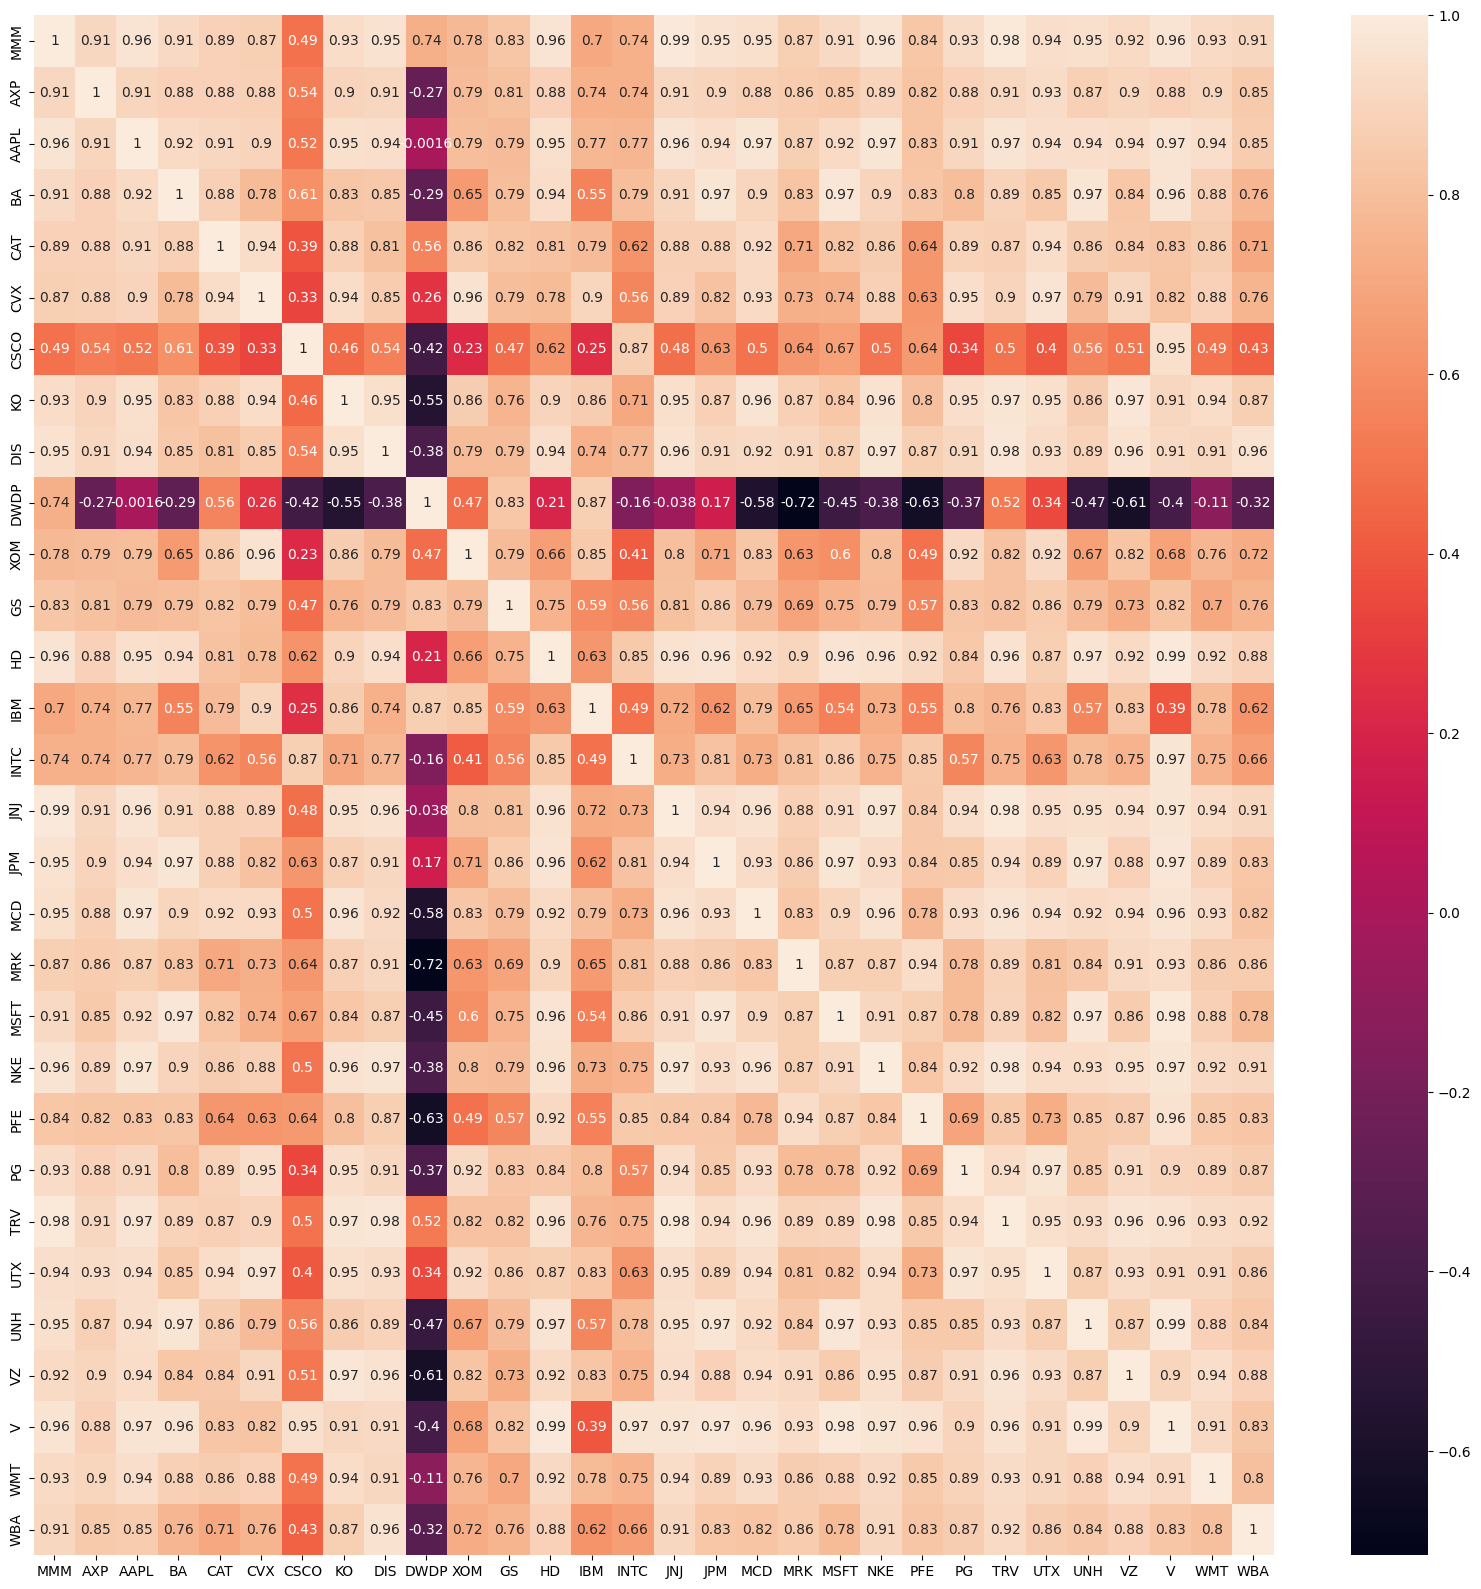

In [23]:
# Filter out non-numeric columns
numeric_df = df.select_dtypes(include='number')

# Compute the correlation matrix
corr_matrix = numeric_df.corr(method='pearson')

# Plot the heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [24]:
#count missing values per column
df.isnull().sum()

,0
MMM,0
AXP,0
AAPL,0
BA,0
CAT,0
CVX,0
CSCO,0
KO,0
DIS,0
DWDP,4441


In [25]:
# Fill NaN values with a method (e.g., backward fill)
numeric_df.fillna(method='bfill', inplace=True)

# Ensure all columns are numeric
numeric_df = numeric_df.apply(pd.to_numeric)

<ipython-input-25-b674931cc64c>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  numeric_df.fillna(method='bfill', inplace=True)


In [26]:
# Fill NaN values with a method (backward fill)
df.fillna(method='bfill',inplace=True)

<ipython-input-26-e465573a70a2>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill',inplace=True)


In [27]:
# Daily Log Returns (%)
log_returns = np.log(df / df.shift(1))

# Daily Linear Returns (%)
data_returns = df.pct_change(1)

#Removing Outliers beyong 3 standard deviation
data_returns= data_returns[data_returns.apply(lambda x :(x-x.mean()).abs()<(3*x.std()) ).all(1)]

data_returns

,MMM,AXP,AAPL,BA,CAT,CVX,CSCO,KO,DIS,DWDP,...,NKE,PFE,PG,TRV,UTX,UNH,VZ,V,WMT,WBA
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-11,-0.017595,0.009056,-0.051151,-0.015793,-0.015710,-0.009331,-0.030055,0.034008,0.010312,0.000000,...,0.050113,-0.001742,0.016393,-0.011299,-0.023209,0.002158,-0.009402,0.000000,-0.014870,0.039649
2000-01-20,-0.037243,0.016790,0.065128,-0.023725,-0.044210,-0.005003,0.000890,0.009655,-0.032230,0.000000,...,-0.023670,-0.016486,-0.024263,-0.005486,-0.022739,0.025210,0.003123,0.000000,-0.010615,0.000000
2000-02-02,-0.017316,-0.028402,-0.014364,0.020114,0.005788,-0.006732,-0.033107,-0.030105,0.034722,0.000000,...,0.016063,-0.027027,-0.008744,-0.048789,0.001118,0.026451,-0.004197,0.000000,-0.005282,0.004512
2000-02-03,-0.008757,-0.007917,0.045542,-0.026664,-0.026013,-0.014402,0.034241,-0.020043,0.016913,0.000000,...,0.009275,-0.010278,-0.008314,-0.044835,-0.015070,-0.008948,-0.014669,0.000000,0.000000,-0.002073
2000-02-04,-0.028684,-0.009208,0.045397,0.012891,0.000000,-0.035363,0.028014,0.018100,0.006600,0.000000,...,-0.024854,0.003368,-0.031285,0.004506,-0.029467,0.024738,0.002053,0.000000,-0.035457,0.010734
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-15,-0.016808,-0.004571,0.020467,0.005366,-0.008422,0.003580,0.018746,0.008908,-0.005871,-0.006681,...,0.023525,0.008497,0.009435,0.010284,0.001894,0.035516,0.001206,0.001751,0.013691,0.016136
2019-01-24,0.001196,0.000100,-0.007926,-0.000948,0.006903,0.019032,0.003300,-0.012016,-0.005130,-0.001772,...,-0.000745,-0.028700,-0.005694,0.011055,-0.012645,-0.003333,-0.011946,0.005036,-0.003546,-0.005439
2019-01-29,0.019410,0.005778,-0.010365,0.005345,0.017368,-0.003031,0.004590,0.004876,0.000812,0.006709,...,-0.001245,0.031369,0.000214,-0.001680,0.023983,0.002137,-0.032504,-0.007280,-0.003606,-0.001118


In [33]:
from sklearn.model_selection import train_test_split

X_train_raw, X_test_raw = train_test_split(data_returns, test_size=0.2, shuffle=False)  # No shuffling to maintain time series order


In [34]:
X_train_raw

,MMM,AXP,AAPL,BA,CAT,CVX,CSCO,KO,DIS,DWDP,...,NKE,PFE,PG,TRV,UTX,UNH,VZ,V,WMT,WBA
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-11,-0.017595,0.009056,-0.051151,-0.015793,-0.015710,-0.009331,-0.030055,0.034008,0.010312,0.0,...,0.050113,-0.001742,0.016393,-0.011299,-0.023209,0.002158,-0.009402,0.000000,-0.014870,0.039649
2000-01-20,-0.037243,0.016790,0.065128,-0.023725,-0.044210,-0.005003,0.000890,0.009655,-0.032230,0.0,...,-0.023670,-0.016486,-0.024263,-0.005486,-0.022739,0.025210,0.003123,0.000000,-0.010615,0.000000
2000-02-02,-0.017316,-0.028402,-0.014364,0.020114,0.005788,-0.006732,-0.033107,-0.030105,0.034722,0.0,...,0.016063,-0.027027,-0.008744,-0.048789,0.001118,0.026451,-0.004197,0.000000,-0.005282,0.004512
2000-02-03,-0.008757,-0.007917,0.045542,-0.026664,-0.026013,-0.014402,0.034241,-0.020043,0.016913,0.0,...,0.009275,-0.010278,-0.008314,-0.044835,-0.015070,-0.008948,-0.014669,0.000000,0.000000,-0.002073
2000-02-04,-0.028684,-0.009208,0.045397,0.012891,0.000000,-0.035363,0.028014,0.018100,0.006600,0.0,...,-0.024854,0.003368,-0.031285,0.004506,-0.029467,0.024738,0.002053,0.000000,-0.035457,0.010734
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-04-14,0.000904,0.002775,-0.004336,-0.000196,0.010470,0.021972,-0.006076,-0.004668,0.001408,0.0,...,0.002619,-0.001710,0.002038,-0.000742,0.002385,0.004608,0.002855,-0.001219,-0.001744,0.002944
2015-04-15,0.002711,0.003271,0.003800,-0.005091,0.026024,0.014425,0.015822,-0.002715,0.003000,0.0,...,0.003014,0.005138,-0.001077,0.002690,0.001529,-0.021681,0.004270,0.002289,-0.005115,-0.004784
2015-04-16,-0.003304,0.014545,-0.004811,-0.003018,-0.001409,-0.002264,0.012389,0.004950,0.010469,0.0,...,0.000701,-0.000568,-0.000120,0.005459,-0.003309,0.036481,-0.002430,-0.000457,-0.006270,-0.022067


In [35]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train_raw),columns = X_train_raw.columns, index = X_train_raw.index)
X_test = pd.DataFrame(scaler.transform(X_test_raw), columns=X_test_raw.columns, index=X_test_raw.index)

In [36]:
X_train

,MMM,AXP,AAPL,BA,CAT,CVX,CSCO,KO,DIS,DWDP,...,NKE,PFE,PG,TRV,UTX,UNH,VZ,V,WMT,WBA
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-11,-1.661798,0.541194,-2.551418,-1.088166,-1.025368,-0.794336,-1.713481,3.419801,0.687666,0.0,...,3.656859,-0.162829,1.738704,-0.878605,-1.871846,0.077903,-0.802625,-0.047983,-1.343270,2.914406
2000-01-20,-3.466421,1.025112,3.102589,-1.611938,-2.794989,-0.449895,0.027563,0.950963,-2.284372,0.0,...,-1.800097,-1.374827,-2.692344,-0.443975,-1.834912,1.582931,0.234563,-0.047983,-0.962761,-0.035241
2000-02-02,-1.636188,-1.802513,-0.762671,1.283060,0.309488,-0.587446,-1.885211,-3.079861,2.392969,0.0,...,1.138559,-2.241270,-1.000906,-3.681483,0.037656,1.663956,-0.371666,-0.047983,-0.485828,0.300448
2000-02-03,-0.849994,-0.520776,2.150241,-1.806031,-1.665098,-1.197928,1.903917,-2.059752,1.148788,0.0,...,0.636482,-0.864465,-0.954062,-3.385878,-1.232958,-0.647139,-1.238777,-0.047983,-0.013461,-0.189478
2000-02-04,-2.680238,-0.601548,2.143210,0.806077,-0.049921,-2.866365,1.553573,1.807042,0.428318,0.0,...,-1.887669,0.257227,-3.457616,0.303097,-2.363087,1.552121,0.145959,-0.047983,-3.184398,0.763307
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-04-14,0.037374,0.148242,-0.275050,-0.058161,0.600172,1.697166,-0.364373,-0.501131,0.065638,0.0,...,0.144223,-0.160176,0.174115,-0.089255,0.137130,0.237847,0.212324,-0.172542,-0.169398,0.183779
2015-04-15,0.203299,0.179247,0.120575,-0.381432,1.565953,1.096473,0.867626,-0.303146,0.176847,0.0,...,0.173441,0.402765,-0.165289,0.167341,0.069989,-1.478466,0.329516,0.185849,-0.470930,-0.391114
2015-04-16,-0.349214,0.884687,-0.298179,-0.244519,-0.137414,-0.231878,0.674519,0.474010,0.698640,0.0,...,0.002374,-0.066313,-0.061010,0.374327,-0.309781,2.318805,-0.225276,-0.094643,-0.574219,-1.676877


In [37]:
X_test

,MMM,AXP,AAPL,BA,CAT,CVX,CSCO,KO,DIS,DWDP,...,NKE,PFE,PG,TRV,UTX,UNH,VZ,V,WMT,WBA
Date,,,,,,,,,,,,,,,,,,,,,
2015-04-21,-0.330442,0.015101,-0.327161,0.240249,-0.549001,-0.455794,0.392319,0.271334,-0.381341,0.000000,...,0.172415,-0.301373,0.228222,-3.034534,0.246371,0.322437,-0.376244,0.946404,-0.139354,-0.060858
2015-04-22,0.329531,0.913775,0.590953,-0.966904,0.652973,-0.218487,-0.159810,1.289709,0.135935,0.000000,...,-0.152731,0.074619,-0.034841,0.068932,-0.043352,-0.867562,0.649573,4.110063,0.444976,-0.095036
2015-04-23,-2.840135,-0.256730,0.332730,-0.621787,-0.108449,0.289981,0.085585,-0.911338,0.653302,0.000000,...,0.659464,0.992301,-1.985423,1.036143,0.151273,0.186413,0.777781,-0.483574,0.841724,-0.317359
2015-04-27,-0.629177,-0.426542,0.820338,-0.312230,0.485857,-0.174809,0.114117,-0.176623,0.369080,0.000000,...,-0.056813,-1.604444,-0.586164,-0.479733,-0.333876,-1.410625,0.058679,-0.623240,-0.539913,0.085894
2015-04-28,0.157785,-0.025407,-0.830340,-0.174806,0.583146,0.978639,0.814874,-0.176841,-0.184950,0.000000,...,-0.840814,-0.281030,-0.291353,0.219436,0.180523,0.695274,0.753080,-0.550377,-0.317682,-0.069794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-15,-1.589489,-0.311429,0.930963,0.309117,-0.572845,0.233321,1.032138,0.875190,-0.442889,-0.006681,...,1.690401,0.678806,0.980327,0.735045,0.098640,2.255749,0.075810,0.130841,1.210957,1.165168
2019-01-24,0.064159,-0.019132,-0.449631,-0.107843,0.378719,1.463192,0.163107,-1.246004,-0.391105,-0.001772,...,-0.104612,-2.378806,-0.668506,0.792724,-1.042646,-0.280573,-1.013313,0.466475,-0.330555,-0.439836
2019-01-29,1.737065,0.336119,-0.568201,0.307723,1.028454,-0.292912,0.235717,0.466455,0.023993,0.006709,...,-0.141568,2.558908,-0.024652,-0.159381,1.832495,0.076532,-2.715706,-0.791655,-0.335946,-0.118385


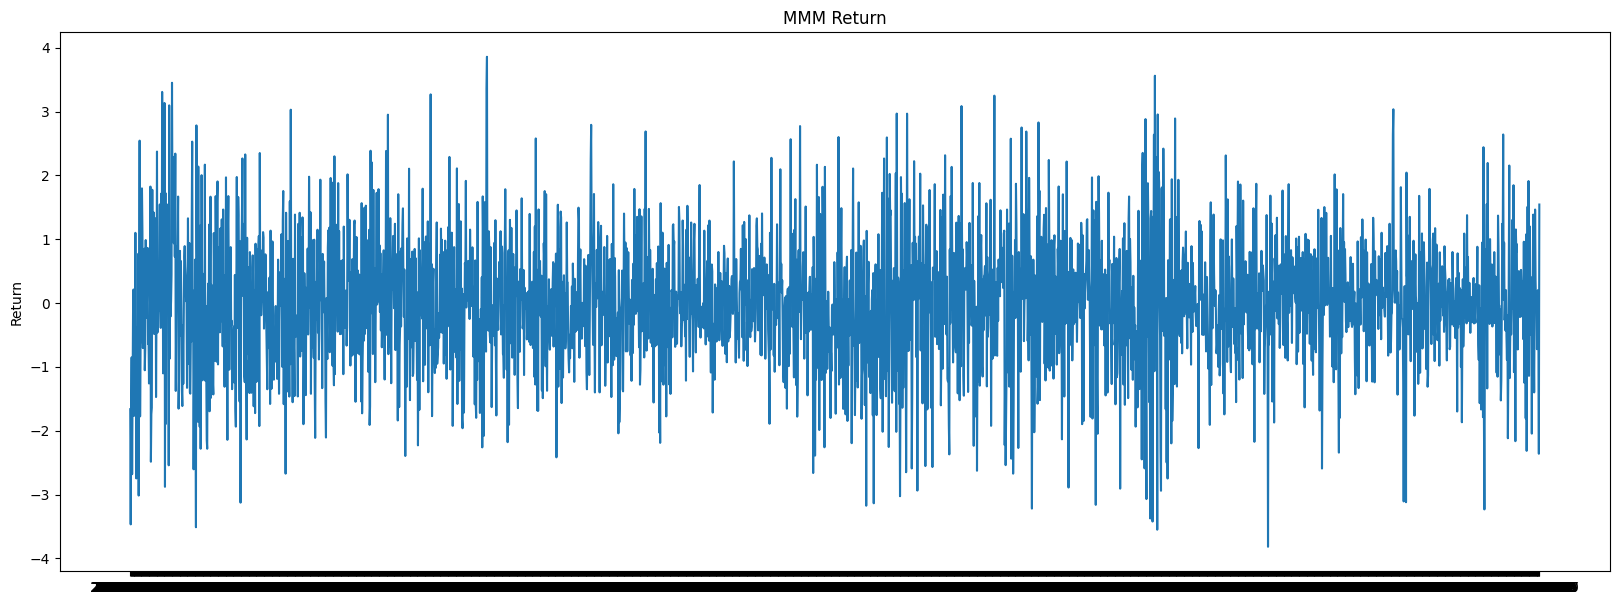

In [39]:
plt.figure(figsize=(20, 7))
plt.plot(X_train['MMM'])
plt.title("MMM Return")
plt.ylabel("Return")
plt.show()

In [40]:
from sklearn.decomposition import PCA
pca=PCA()

pca.fit_transform(X_train)

array([[-2.01497390e-01,  2.67214846e+00, -1.62354289e+00, ...,
        -1.55469121e+00,  1.03896353e+00, -9.08397270e-15],
       [-3.97637324e+00,  2.53032208e-01, -1.52602692e+00, ...,
         4.81096362e-01, -1.06514391e+00,  4.11859739e-15],
       [-2.63900379e+00, -5.27359400e-01,  1.58744721e+00, ...,
         8.73267732e-02,  1.07280451e+00, -1.65959390e-14],
       ...,
       [-6.07913360e-01, -6.12290627e-01,  4.20442721e-01, ...,
        -4.53389411e-01, -1.58338089e-01,  8.13548845e-16],
       [-6.45049598e+00, -1.16767482e-01,  1.51134105e-01, ...,
         5.47537913e-01,  5.14462480e-02,  2.09532469e-16],
       [ 4.15784322e+00, -9.76314090e-01, -2.86539366e-01, ...,
         3.69005809e-01, -4.76561362e-01,  4.88324573e-16]])

In [41]:
pca.components_[0]

array([2.27816507e-01, 2.22132328e-01, 1.45775833e-01, 1.89075281e-01,
       2.05706774e-01, 1.85633342e-01, 1.87260057e-01, 1.65933185e-01,
       2.03193595e-01, 2.01948392e-28, 1.95753271e-01, 2.08249643e-01,
       1.95891169e-01, 1.98938870e-01, 1.91132220e-01, 1.69419867e-01,
       2.21346709e-01, 1.48014337e-01, 1.67889196e-01, 1.94939349e-01,
       1.75054875e-01, 1.88892077e-01, 1.69430922e-01, 1.91535505e-01,
       2.22963704e-01, 1.35365519e-01, 1.64701468e-01, 1.28085279e-01,
       1.71188252e-01, 1.62910381e-01])

In [42]:
pca.explained_variance_ratio_

array([3.60573917e-01, 5.53290817e-02, 4.36405132e-02, 3.90947175e-02,
       3.45264431e-02, 3.02801239e-02, 2.89369732e-02, 2.82810221e-02,
       2.69924184e-02, 2.62115259e-02, 2.46370359e-02, 2.33111089e-02,
       2.24716608e-02, 2.18288054e-02, 2.08266032e-02, 1.94296630e-02,
       1.92817140e-02, 1.89298348e-02, 1.83856927e-02, 1.78441106e-02,
       1.73476551e-02, 1.60848963e-02, 1.52285352e-02, 1.41108543e-02,
       1.39717183e-02, 1.35639616e-02, 1.19414125e-02, 1.01199589e-02,
       6.81804271e-03, 1.20253944e-17])

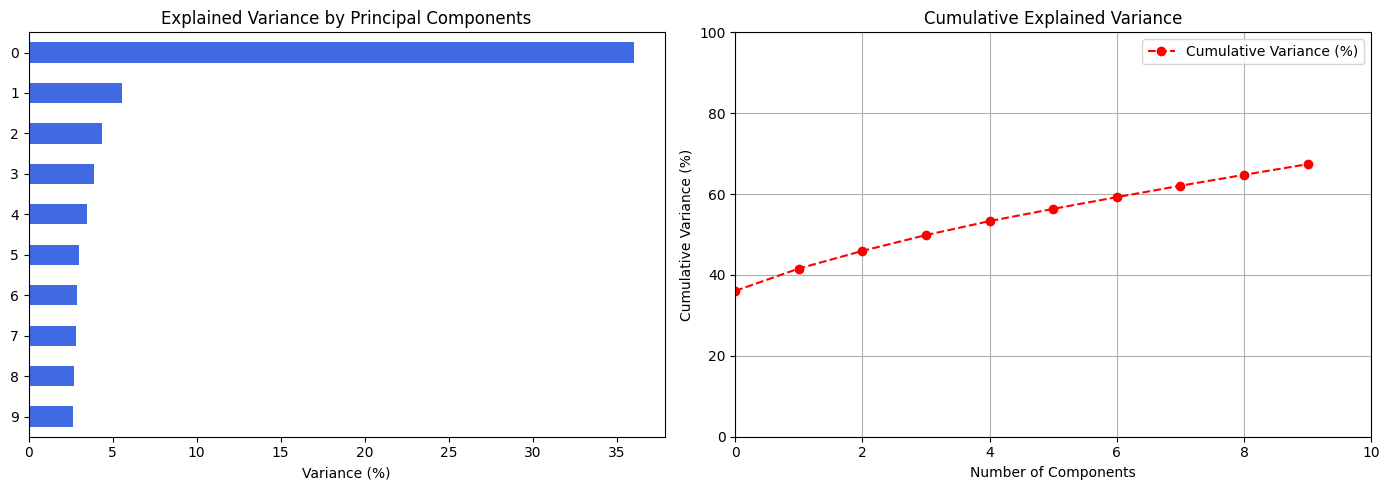

In [43]:
fig, axes = plt.subplots(ncols=2, figsize=(14, 5))

explained_variance = pca.explained_variance_ratio_[:10] * 100  # Convert to percentage
cumulative_variance = np.cumsum(explained_variance)

variance_df = pd.DataFrame({'Explained Variance (%)': explained_variance})
cumulative_var_df = pd.DataFrame({'Cumulative Variance (%)': cumulative_variance})

# Plotting Explained Variance
variance_df.plot(kind='barh', legend=False, ax=axes[0], color="royalblue")
axes[0].set_title("Explained Variance by Principal Components")
axes[0].set_xlabel("Variance (%)")
axes[0].invert_yaxis()

# Plotting Cumulative Explained Variance
cumulative_var_df.plot(ylim=(0, 100), xlim=(0, 10), ax=axes[1], color="red", marker='o', linestyle='--')
axes[1].set_title("Cumulative Explained Variance")
axes[1].set_xlabel("Number of Components")
axes[1].set_ylabel("Cumulative Variance (%)")
axes[1].grid()

plt.tight_layout()
plt.show()

In [45]:
Cumm_Var = pd.DataFrame({'Explained Variance': cumulative_variance})
Cumm_Var

,Explained Variance
0,36.057392
1,41.590300
2,45.954351
3,49.863823
4,53.316467
5,56.344480
6,59.238177
7,62.066279
8,64.765521
9,67.386674


In [46]:
def PCWeights():
    weights = pd.DataFrame()
    for i in range(len(pca.components_)):
        weights['weights_{}'.format(i)] = pca.components_[i] / sum(pca.components_[i])
    return weights.values.T

weights = PCWeights()

In [47]:
top_Comp = 10  # Number of top components to consider
topPortfolios = pd.DataFrame(pca.components_[:top_Comp], columns=data_returns.columns)
eigen_portfolios = topPortfolios.div(topPortfolios.sum(1), axis=0)
eigen_portfolios.index = ['Portfolio {}'.format(i) for i in range(top_Comp)]

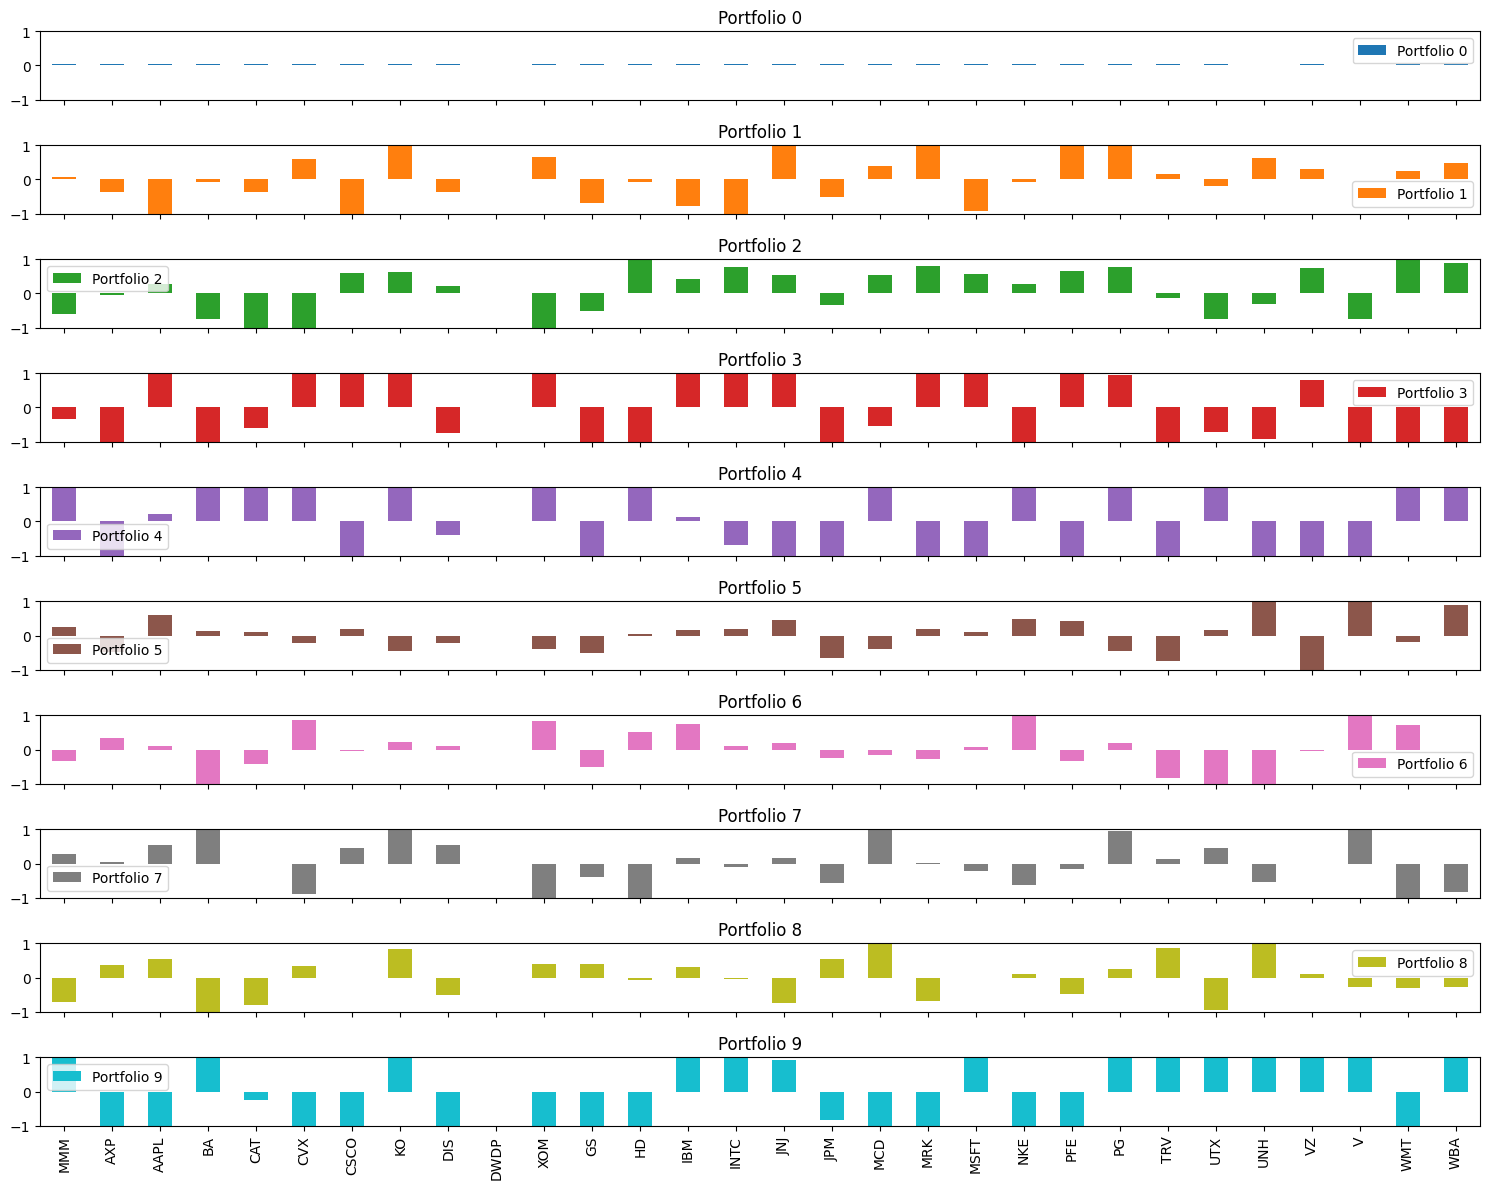

In [48]:
np.sqrt(pca.explained_variance_)
eigen_portfolios.T.plot.bar(subplots=True, layout=(int(top_Comp),1), figsize=(15,12), ylim=(-1,1))
plt.tight_layout()
plt.show()

<Axes: >

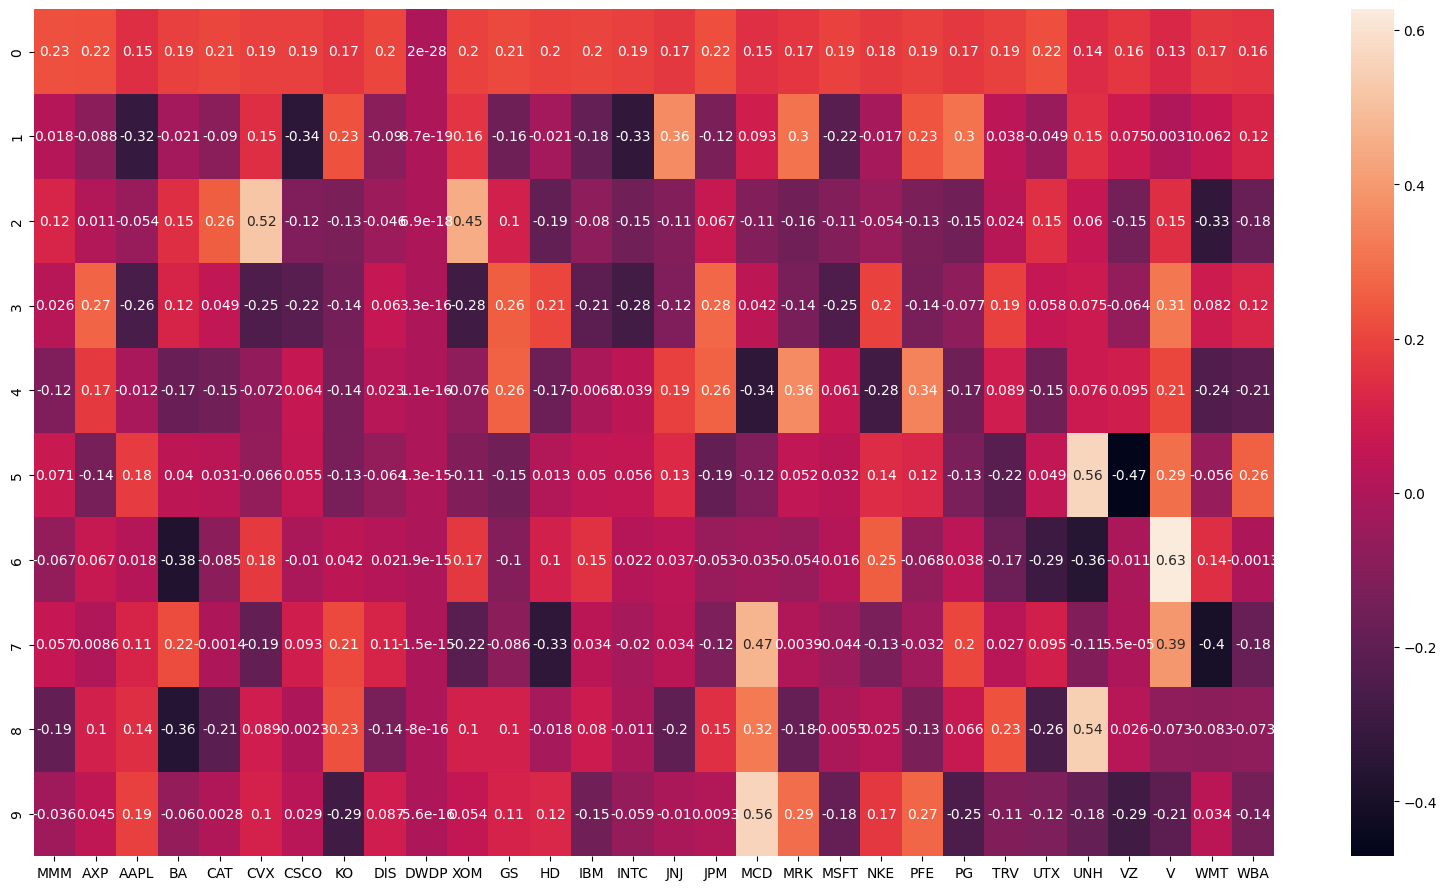

In [49]:
plt.figure(figsize=(20,11))
sns.heatmap(topPortfolios,  annot = True)